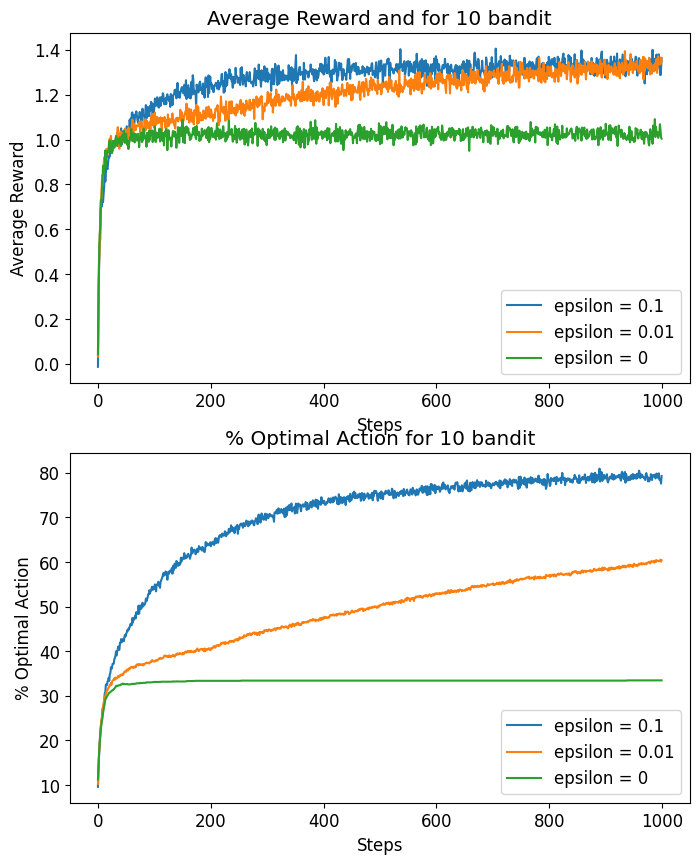

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def action_value(Q, epsilon):
  """
  The agent makes decisions by estimating which slot machine is likely to give the best reward based on its past experiences.
  """

  if np.random.rand() < epsilon:
      value = np.random.randint(len(Q)) # Exploration: Randomly selecting an action.

  else:
      max = np.max(Q) # Exploitation: Selecting the action with the highest estimated value

      # A random selection will be made from the options that share the highest value if there is a tie for the highest estimate
      options = np.where(Q == max)[0]
      if len(options) > 1:
          value = np.random.choice(options)
      else:
          value = options[0]

  return value # Return the index of arm


def bandit_algo(arm, steps, epsilon):
    """
    The program runs through the multi-armed bandit scenario for a set number of rounds
    and updates the estimated mean reward for each arm based on the rewards received.
    """

    # Setting the initial true mean reward for each arm
    true = np.random.normal(size=arm)

    # Setting the initial estimated mean reward for each arm in the agent's configuration
    estimated = np.zeros(arm)

    # Setting the initial count or number of times each arm has been chosen in the agent's configuration
    N = np.zeros(arm)

    rewards = np.zeros(steps) # initiating rewards
    optimal = np.zeros(steps)  # initiating optimal

    # Genrating rewards and optimal values at each time steps
    for i in range(steps):
        action = action_value(estimated, epsilon)
        reward = np.random.normal(true[action], 1)
        rewards[i] = reward
        N[action] += 1
        estimated[action] += (reward - estimated[action]) / N[action]

        if action == np.argmax(true):
            optimal[i] = 1

    return rewards, optimal # Returns the rewards and optimal at each time step

# Parameters for the bandit problem
arm = 10
steps = 1000
epsilons = [0.1, 0.01, 0]
num_runs = 2000

avg_rewards = np.zeros((len(epsilons), steps))
avg_optimal = np.zeros((len(epsilons), steps))

# Run the bandit algorithm for num_runs times and average the results
for i in range(num_runs):
    for j, e in enumerate(epsilons):
        rewards, optimal = bandit_algo(arm, steps, e)
        avg_rewards[j] += (rewards - avg_rewards[j]) / (i + 1)
        avg_optimal[j] += (optimal - avg_optimal[j]) / (i + 1)



# set the font size
plt.rcParams.update({'font.size': 12})

# create a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

# plot the average reward in the top subplot
ax[0].set_title(f"Average Reward and for {arm} bandit")
for i, epsilon in enumerate(epsilons):
  ax[0].plot(avg_rewards[i], label="epsilon = {}".format(epsilon))
ax[0].set_xlabel("Steps")
ax[0].set_ylabel("Average Reward")
ax[0].legend(loc="lower right")


# plot the % optimal action in the bottom subplot
ax[1].set_title(f'\n% Optimal Action for {arm} bandit')

for i, epsilon in enumerate(epsilons):
  ax[1].plot(avg_optimal[i] * 100, label="epsilon = {}".format(epsilon))
ax[1].set_xlabel("Steps")
ax[1].set_ylabel("% Optimal Action")
ax[1].legend(loc="lower right")

# use a color map to distinguish between the lines in the plot
plt.set_cmap('tab10')

# display the plot
plt.show()